 # 1. Using math to find the autocovariance function for an MA(1), MA(2) and an AR(1) time series

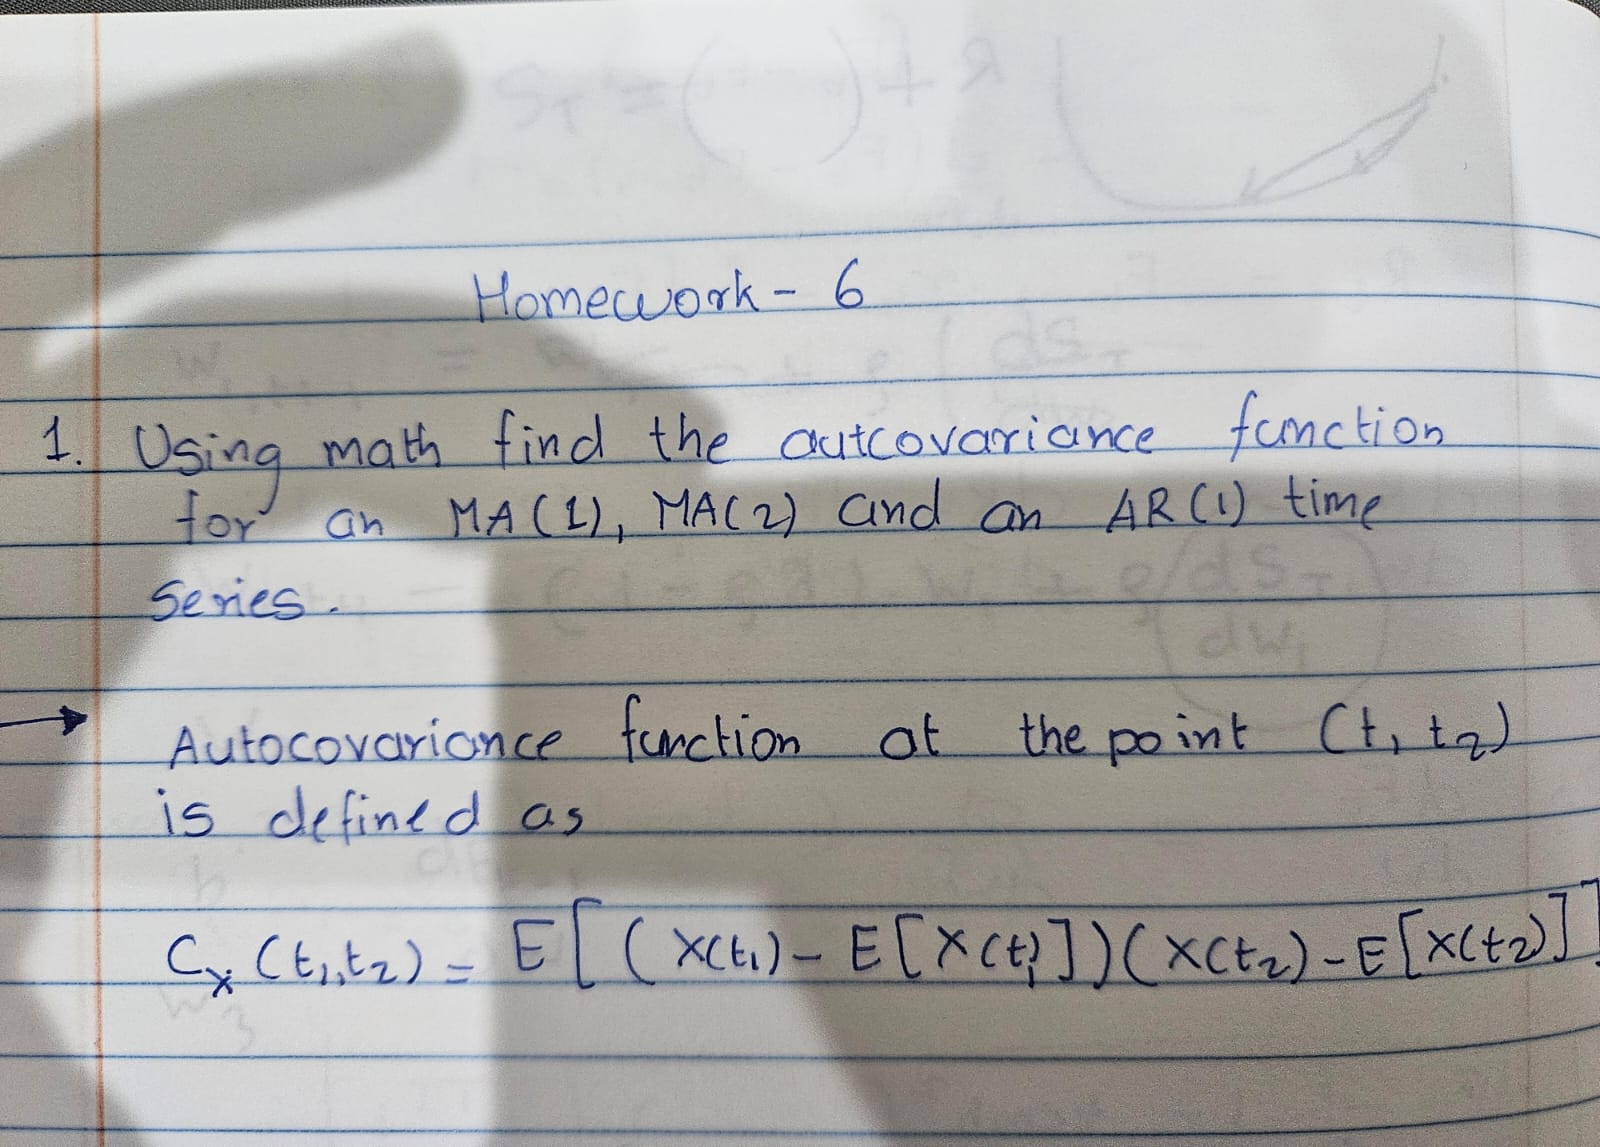

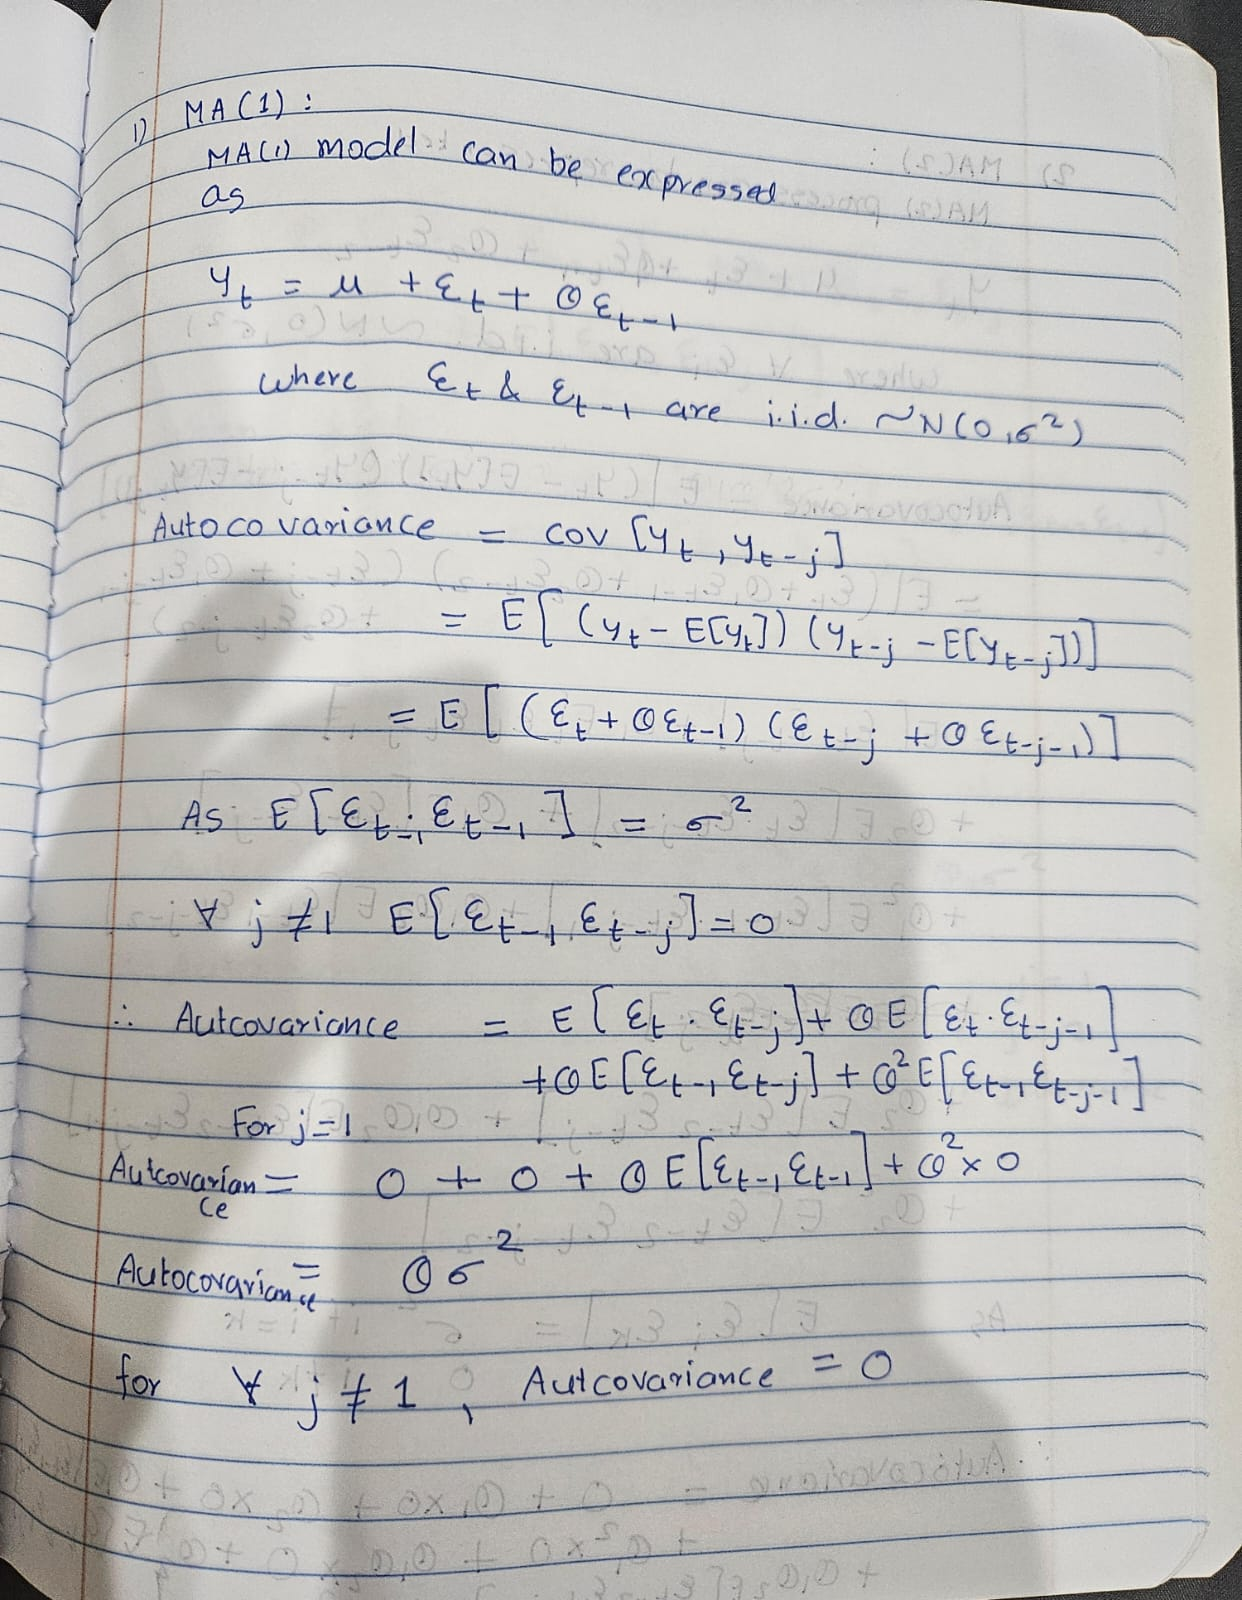

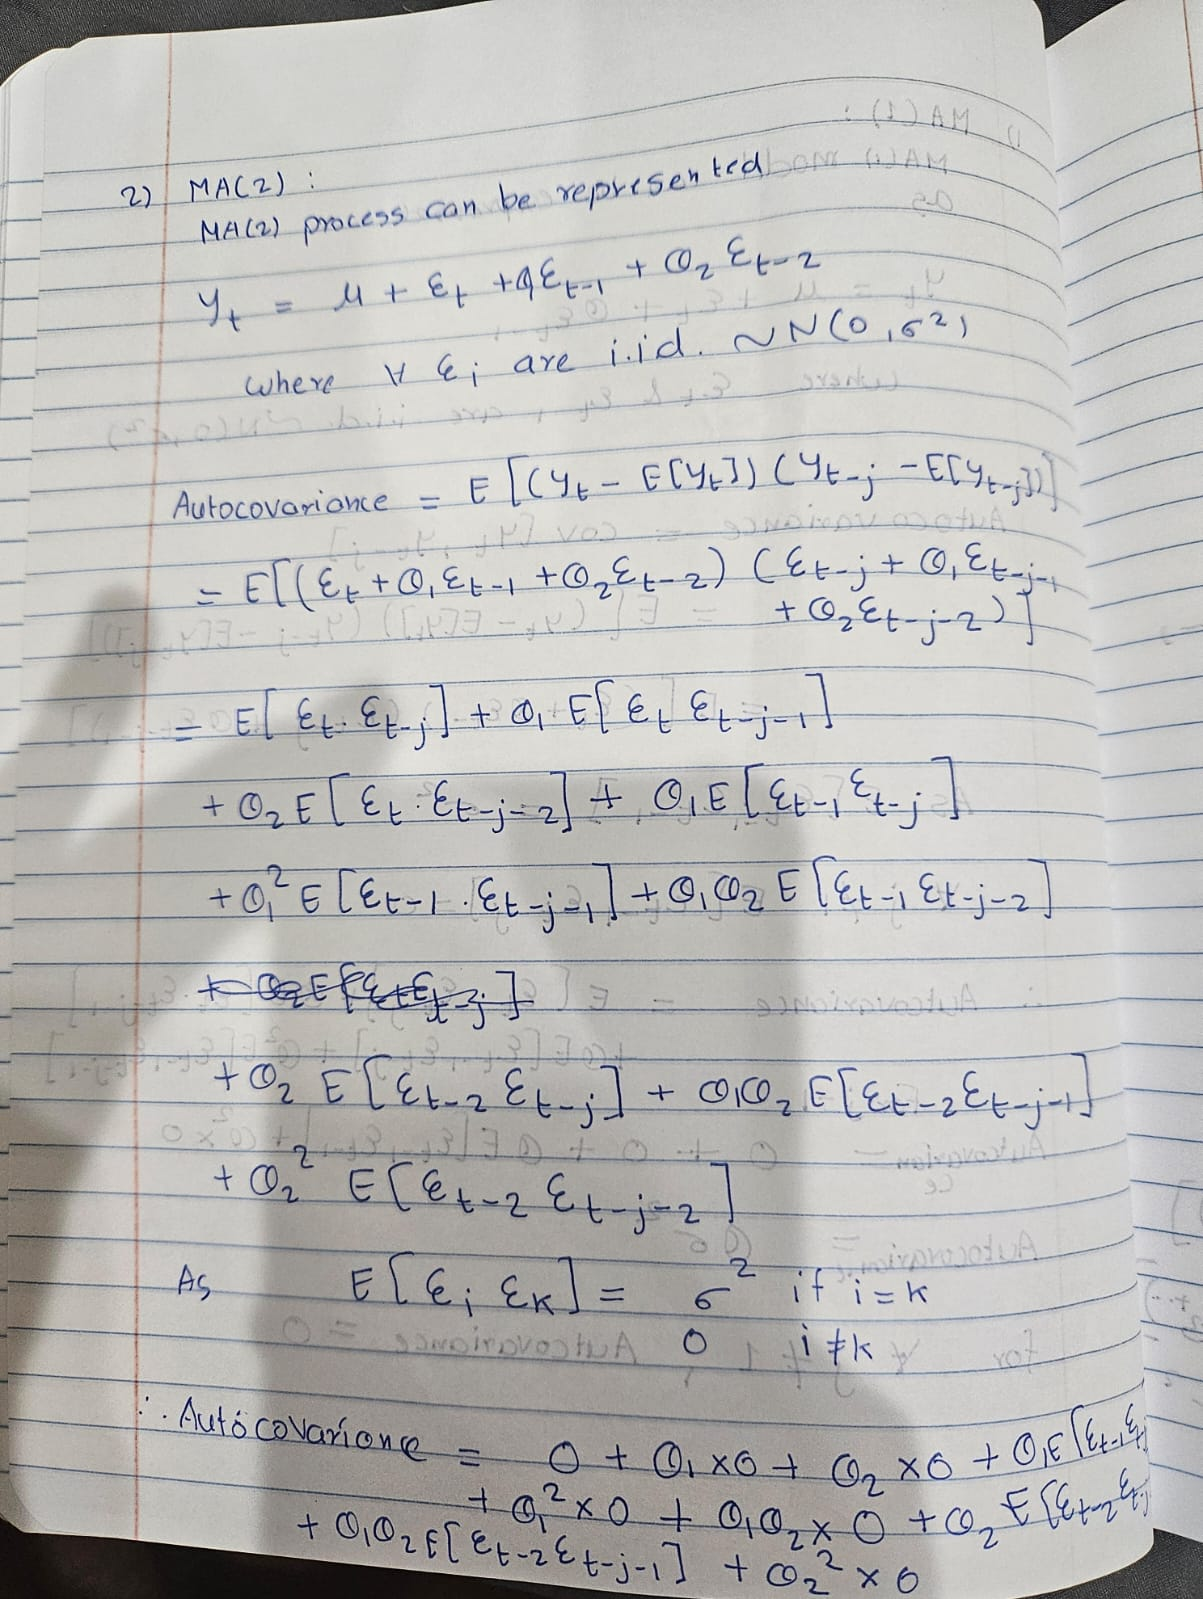

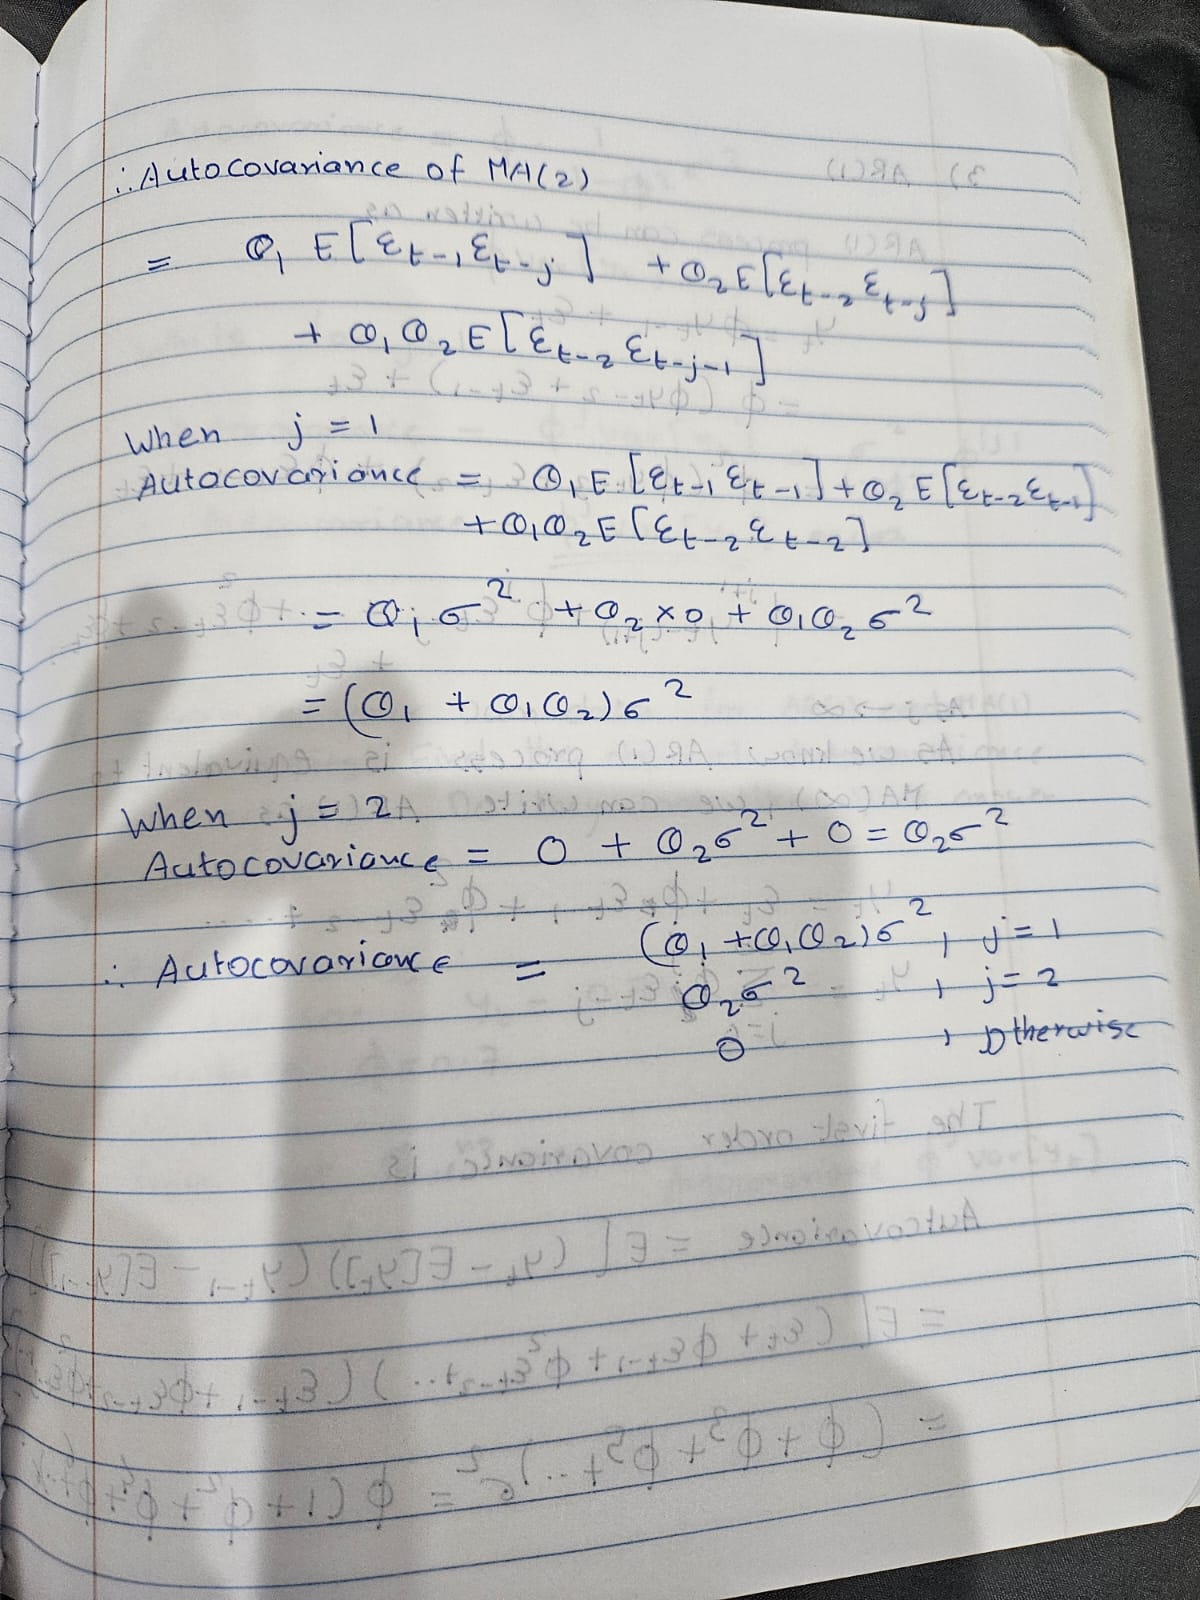

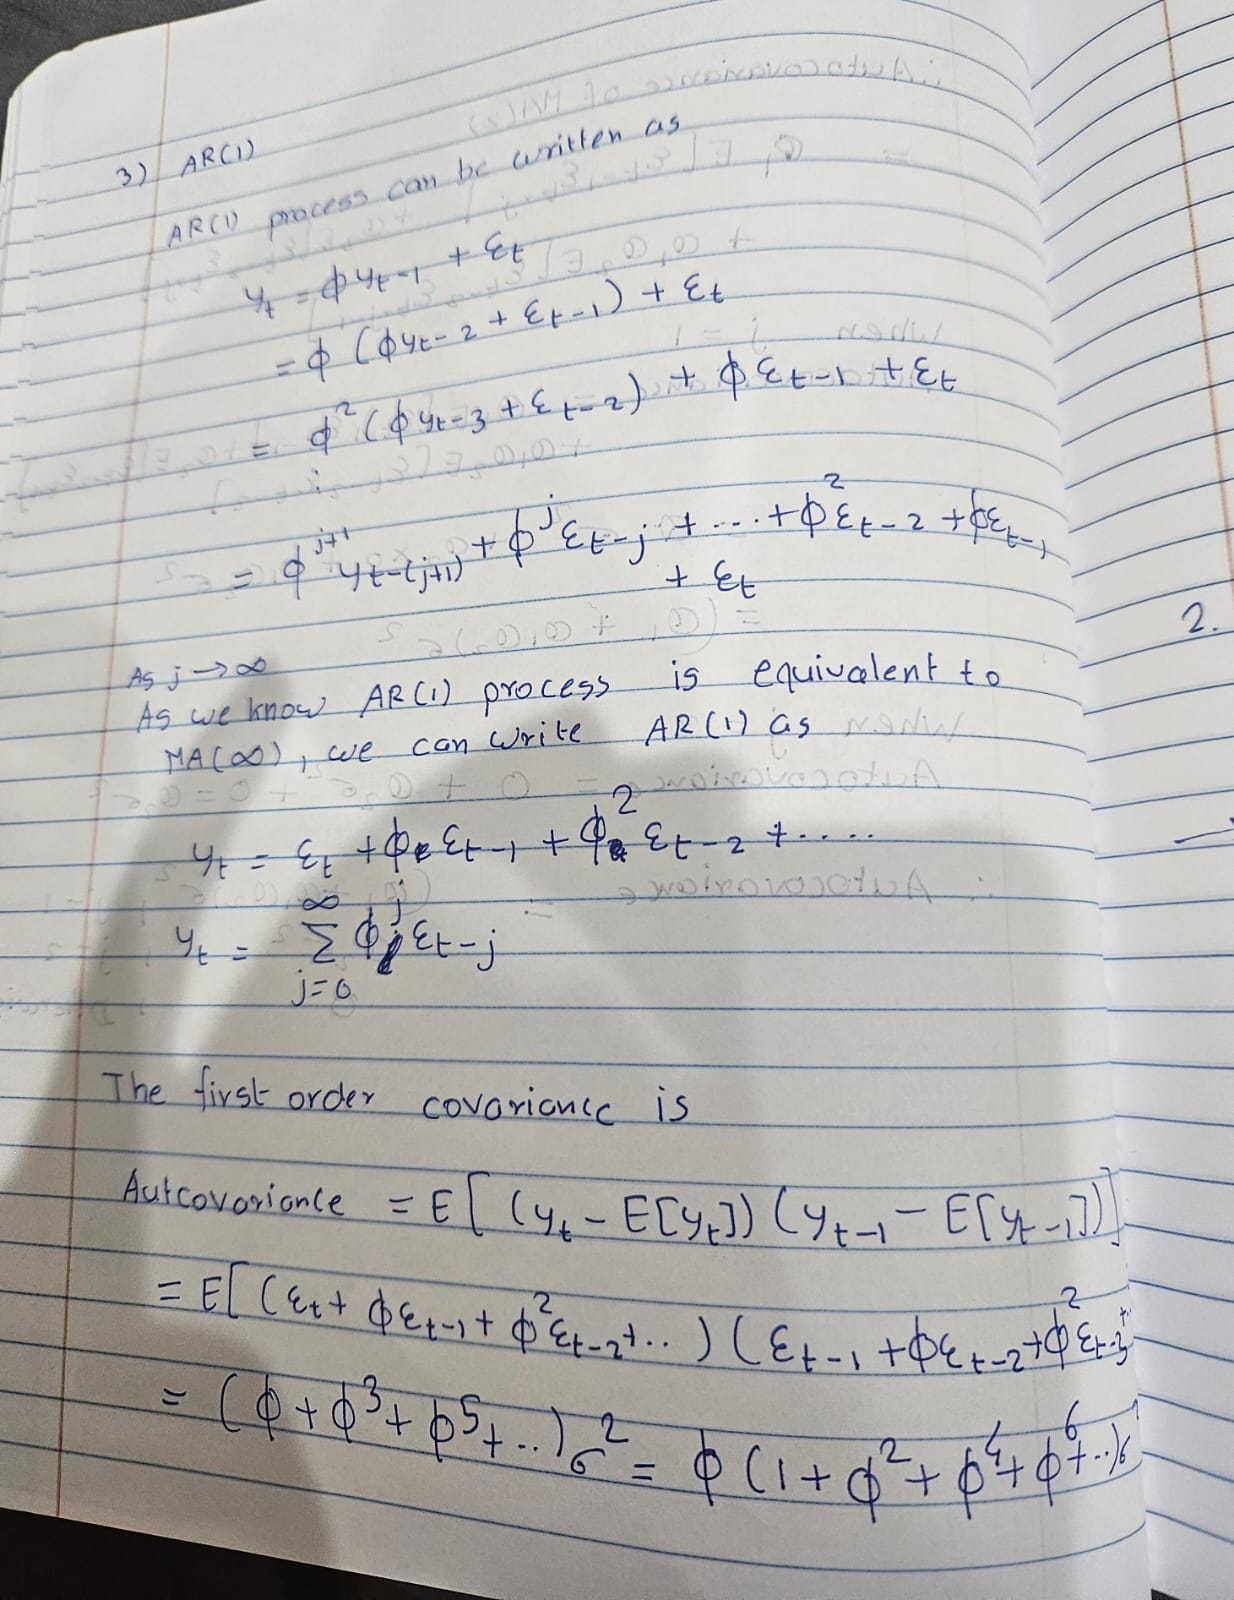

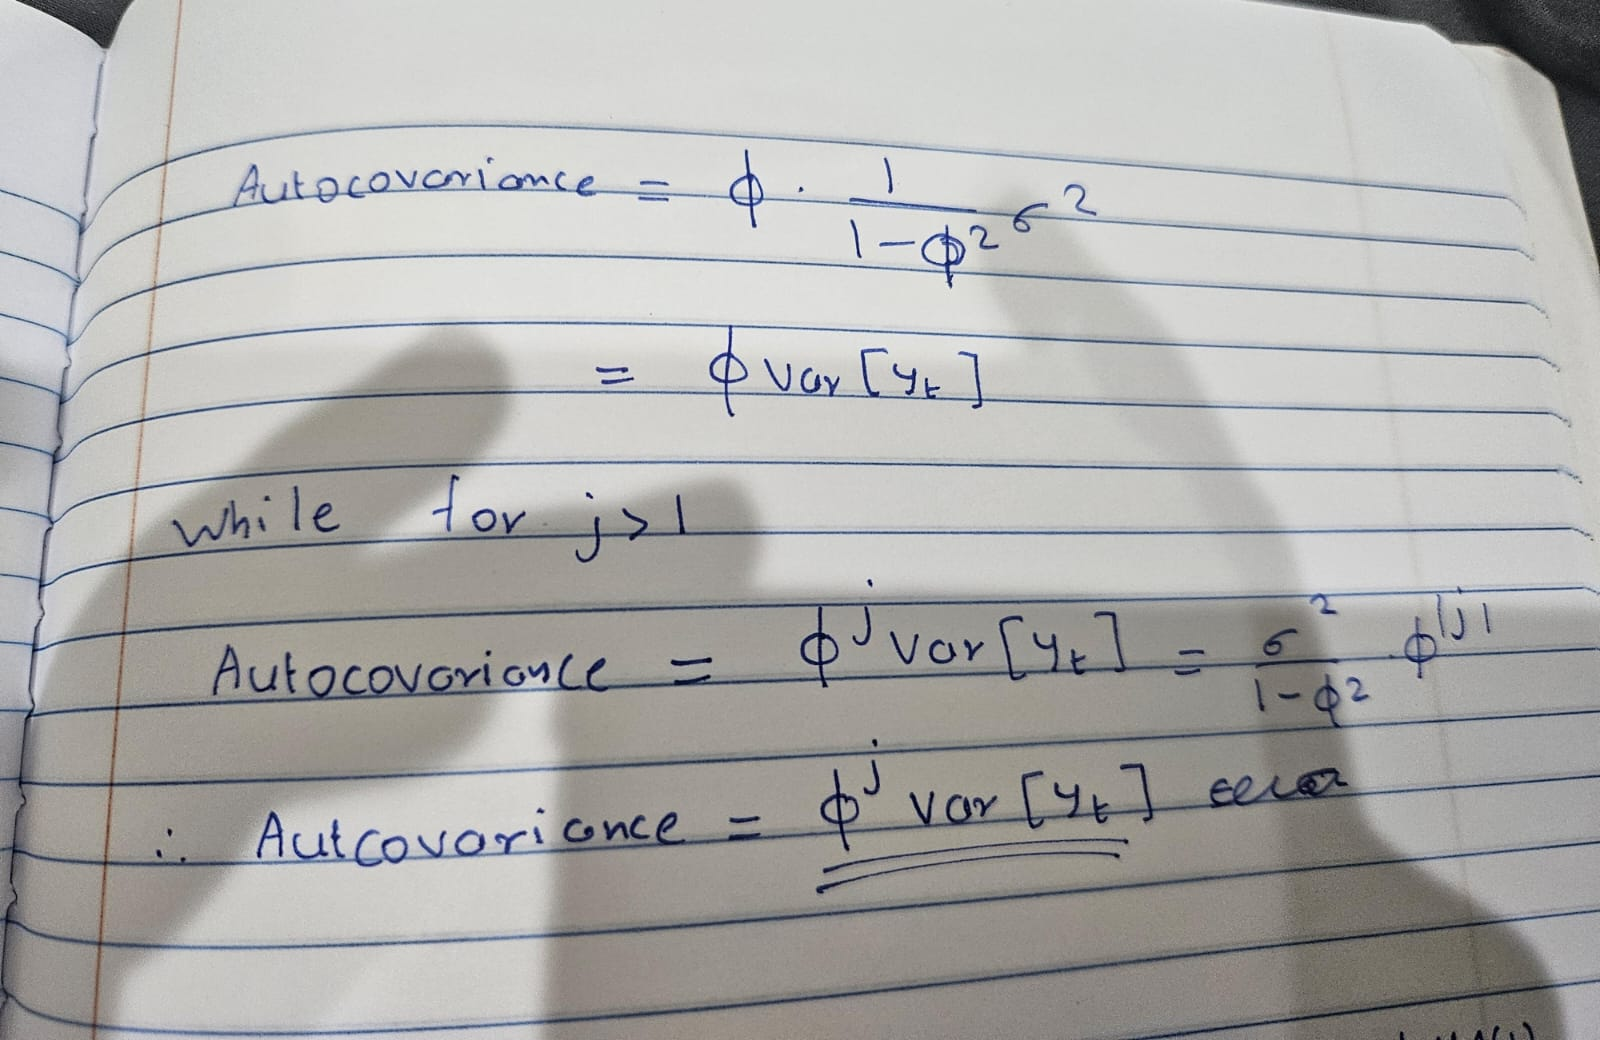

# 2. Generate data for your own AR(1) and MA(1) time series.  Find the observed Autocovariance functions. 

In [67]:
import numpy as np
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import acovf

# Seed the random number generator for reproducibility
np.random.seed(42)

# Define the AR(1) and MA(1) processes
# AR(1) model: y_t = 0.7*y_{t-1} + e_t
ar1 = np.array([1, -0.7])
ma1 = np.array([1])

# MA(1) model: y_t = e_t + 0.7*e_{t-1}
ar2 = np.array([1])
ma2 = np.array([1, 0.7])

# Generate sample data for both processes
ar1_process = ArmaProcess(ar1, ma1)
ar1_data = ar1_process.generate_sample(nsample=100)

ma1_process = ArmaProcess(ar2, ma2)
ma1_data = ma1_process.generate_sample(nsample=100)


We are using white noise ie standard normal noise, hence sigma = 1 by default

AR(1) Process:
    current value is linearly dependent on its immediate past value plus some noise.
    Usage in the example: The ArmaProcess class was used with ar1 = np.array([1, -0.7]) to define an AR(1) process with a coefficient of 0.7. The MA component was set to np.array([1]), indicating a simple white noise process without additional MA structure.

MA(1) Process:
    Purpose: To generate a series where the current value is affected by the noise (or shock) of the current and the immediate past period.
    Usage in the example: The ArmaProcess class was used with ma2 = np.array([1, 0.7]) to define an MA(1) process with a coefficient of 0.7. The AR component was set to np.array([1]), indicating no autoregressive structure, only the moving average component.

In [81]:
# Compute autocovariance using statsmodels' acovf function
ar1_autocov = acovf(ar1_data, fft=False)[:10]  # First 10 lags
ma1_autocov = acovf(ma1_data, fft=False)[:10]  # First 10 lags

# Print the autocovariance values
print("AR(1) Autocovariance:", ar1_autocov)

AR(1) Autocovariance: [ 1.50858488  1.01988599  0.68764021  0.48861736  0.37300405  0.36914464
  0.18815266  0.05225658 -0.07884428 -0.07173618]


In [82]:
print("MA(1) Autocovariance:", ma1_autocov)

MA(1) Autocovariance: [ 1.21790183  0.46523635 -0.11259405 -0.13218276 -0.25032869 -0.05334472
  0.16975914  0.1153857  -0.07055345 -0.16136356]


# Do they look like your answer to (1) ? 

In [83]:
# theoritical autocovariances for AR(1)
TheoriticalAutocovariance = []
phi = -0.7
variance = np.var(ar1_data)
for i in range(10):
    # making the adjustment of -1 raise to i to take python indexing into account
    TheoriticalAutocovariance.append((-1)**(i) * phi**(i) * variance)
print("Theoritical Autocovariances for AR(1)", TheoriticalAutocovariance)

Theoritical Autocovariances for AR(1) [1.5085848765395207, 1.0560094135776643, 0.739206589504365, 0.5174446126530554, 0.36221122885713886, 0.25354786019999714, 0.177483502139998, 0.12423845149799859, 0.086966916048599, 0.060876841234019305]


In [84]:
# theoritical autocovariances for MA(1)
TheoriticalAutocovariance = []
phi = 0.7
TheoriticalAutocovariance.append(phi * 1)
for i in range(9):
    TheoriticalAutocovariance.append(0)
print("Theoritical Autocovariances for MA(1)", TheoriticalAutocovariance)

Theoritical Autocovariances for MA(1) [0.7, 0, 0, 0, 0, 0, 0, 0, 0, 0]


As we can see from the data, the theoritical autocovariancesof AR(1) approximately match the observed autocovariances but for MA(1) process the initial coefficient is little bit away from theoritical value but as we go further, the coefficients go to 0 in magnitude

# 3. Find a data set (weather data is best) and find its Autocovariance function.  Guess if its AR(1) or MA(1) and explain why.  

In [90]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import acovf

# Load the dataset
df = pd.read_csv('weatherHistory.csv')


variable_of_interest = 'Temperature (C)'

# Calculate the autocovariance function for the variable of interest
autocovariance = acovf(df[variable_of_interest], fft=False, missing='drop')

# Display the first few lags of the autocovariance function
print(autocovariance[:10])

# If the autocovariance values decrease slowly as the lag increases, it may suggest an AR(1) process
# If the autocovariance significantly drops to near zero after the first lag, it could indicate an MA(1) process


[91.23109125 90.01887979 88.08611381 85.47220945 82.39673611 79.10067106
 75.75944487 72.53974837 69.56841818 66.98666513]


# We can use the decline of autocovariances as lag increases to predict if the time series is AR(1) or MA(1).
If the autocovariance values decrease slowly as the lag increases, it may suggest an AR(1) process
If the autocovariance significantly drops to near zero after the first lag, it could indicate an MA(1) process

# As we can see that the autocovariances decreases steadily as lag increases, it may indicate an AR(1) process for our data.